In [1]:
import matplotlib.pyplot as plt
# plt.interactive(False)
from scipy.stats import gaussian_kde
from scipy.special import kl_div
import numpy as np
import pickle
import warnings
warnings.filterwarnings("ignore")
legend_properties = {'weight':'bold'}
nus_blue = "#003D7C"
nus_orange = "#EF7C00"
# Nature three colors
nature_orange = "#F16C23"
nature_blue = "#2B6A99"
nature_green = "#1B7C3D"
# Morandi six colors
morandi_blue = "#046586"
morandi_green =  "#28A9A1"
morandi_yellow = "#C9A77C"
morandi_orange = "#F4A016"
morandi_pink = "#F6BBC6"
morandi_red = "#E71F19"
morandi_purple = "#B08BEB"
# Others
shallow_grey = "#D3D4D3"
deep_grey = "#A6ABB6"
# Red and Blue
strong_red = "#A61C5D"
strong_blue = "#1B64A4"

# Shallow-deep pair
shallow_purple = "#EAD7EA"
deep_purple = "#BA9DB9"
shallow_cyan = "#A9D5E0"
deep_cyan = "#48C0BF"
shallow_blue = "#B6DAEC"
deep_blue = "#98CFE4"
shallow_pink = "#F5E0E5"
deep_pink = "#E5A7B6"
shallow_green = "#C2DED0"
deep_green = "#A5C6B1"

color_pairs = [[shallow_purple, deep_purple],  [shallow_green, deep_green],
               [shallow_blue, deep_blue], [shallow_pink, deep_pink], [shallow_cyan, deep_cyan],
               [shallow_grey, deep_grey]]
morandi_colors = [morandi_blue, morandi_green, morandi_yellow, morandi_orange, morandi_pink, morandi_red, morandi_purple]


In [22]:
# Baseline: independent search
baseline_folder = r"E:\data\gst-0730-23\Baseline_12knowledge"
g_performance_file = baseline_folder + r"\g_performance_across_K"
s_performance_file = baseline_folder + r"\s_performance_across_K"

g_variance_file = baseline_folder + r"\g_variance_across_K"
s_variance_file = baseline_folder + r"\s_variance_across_K"

with open(g_performance_file, 'rb') as infile:
    g_fitness = pickle.load(infile)
with open(s_performance_file, 'rb') as infile:
    s_fitness = pickle.load(infile)

with open(g_variance_file, 'rb') as infile:
    g_variance = pickle.load(infile)
with open(s_variance_file, 'rb') as infile:
    s_variance = pickle.load(infile)


print(g_fitness)

[0.8328241365138888, 0.7821215188644208, 0.7593962367603265, 0.7452251817960396, 0.7420317687460894, 0.7368563213208111, 0.7261022420275551, 0.7169818524959954, 0.7105988441234078]


In [29]:
data_folder = r"E:\data\gst-0815-23\Hyper-parameters\EvaluatingForwardBackward_GG"
# GG
roll_forward_list = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
roll_back_list = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

multiple_lines = {}
for roll_forward in roll_forward_list:
    for roll_back in roll_back_list:
        # gg_fitness, gg_variance, gg_fitness_across_time = [], [], []
        gg_performance_file = data_folder + r"\gg_performance_across_K_forward_{0}_backward_{1}".format(roll_forward, roll_back)
        gg_variance_file = data_folder + r"\gg_variance_across_K_forward_{0}_backward_{1}".format(roll_forward, roll_back)
        gg_performance_time_file = data_folder + r"\gg_performance_across_K_time_forward_{0}_backward_{1}".format(roll_forward, roll_back)

        # GG
        with open(gg_performance_file, 'rb') as infile:
            gg_fitness = pickle.load(infile)
        with open(gg_variance_file, 'rb') as infile:
            gg_variance = pickle.load(infile)
        with open(gg_performance_time_file, 'rb') as infile:
            gg_fitness_across_time = pickle.load(infile)
        multiple_lines["a={0}, b={1}".format(roll_forward, roll_back)] = gg_fitness
        
print(len(multiple_lines))
print(len(multiple_lines["a=0, b=0"]))
print(multiple_lines["a=0, b=0"])

100
9
[0.7097795758829087, 0.7181428377405944, 0.708964769143475, 0.7010480967996059, 0.6907988600275023, 0.6826744800717349, 0.6757034414857117, 0.6687117089850877, 0.6553636715696124]


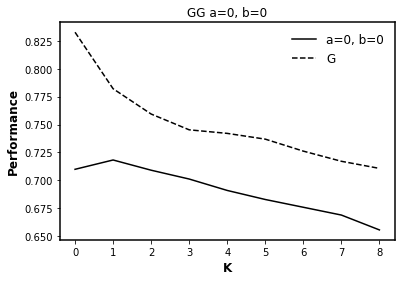

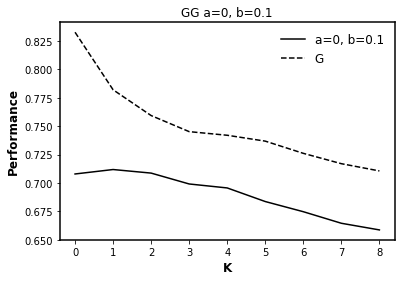

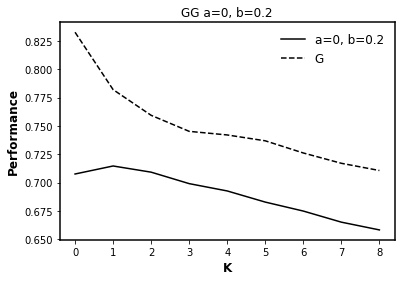

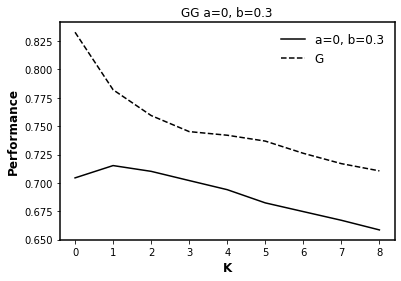

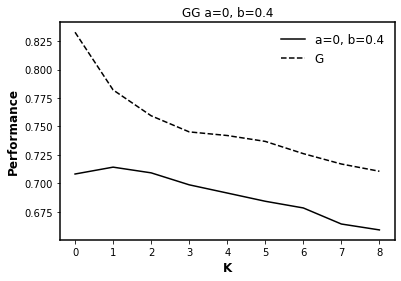

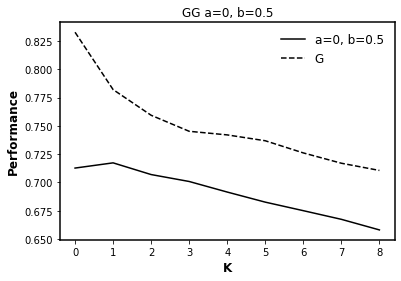

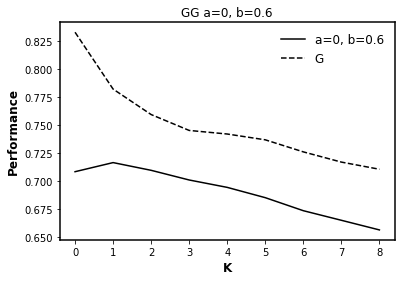

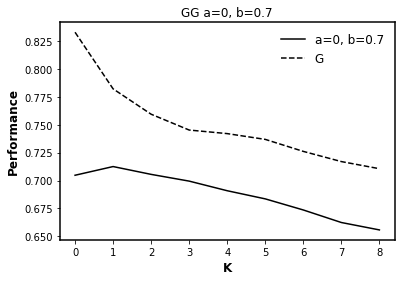

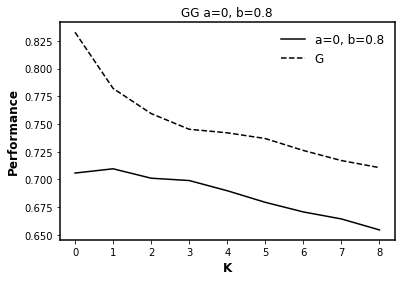

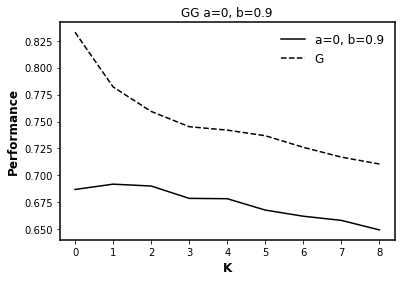

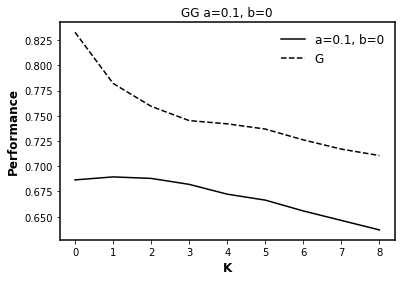

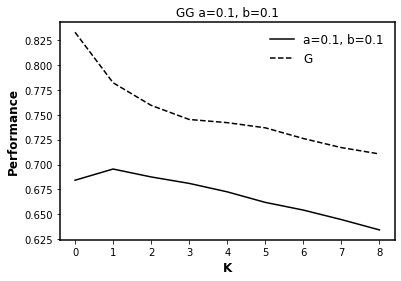

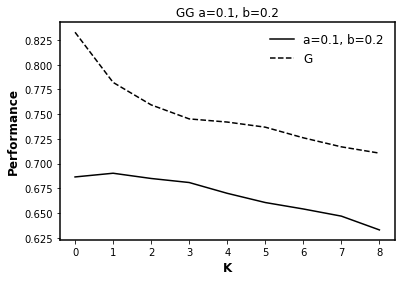

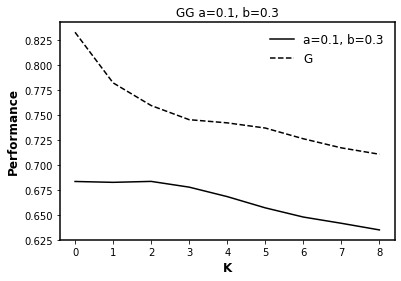

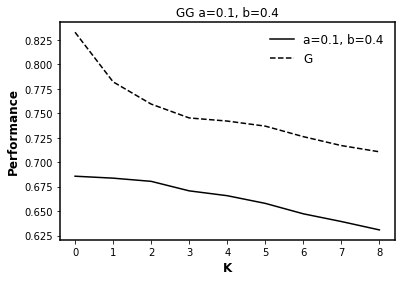

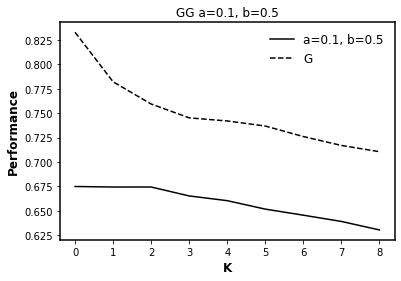

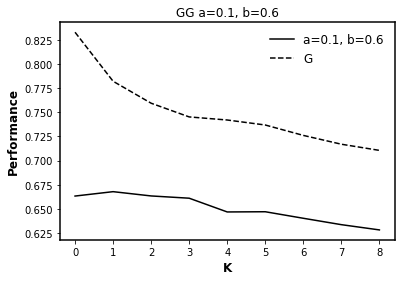

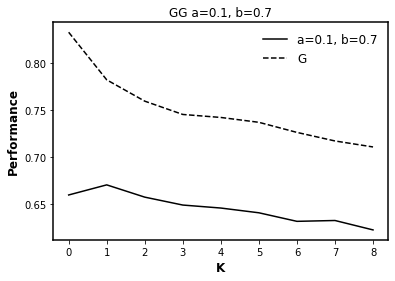

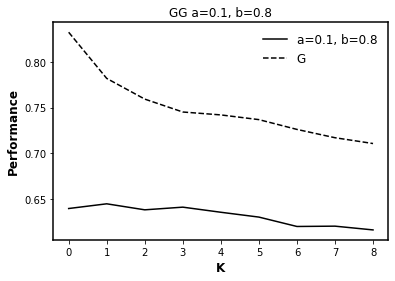

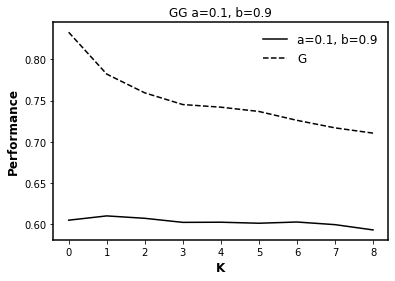

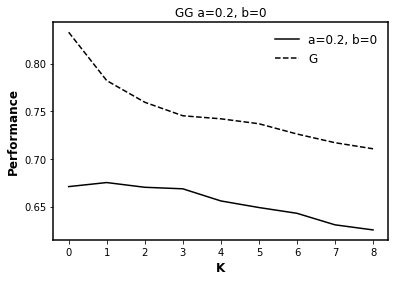

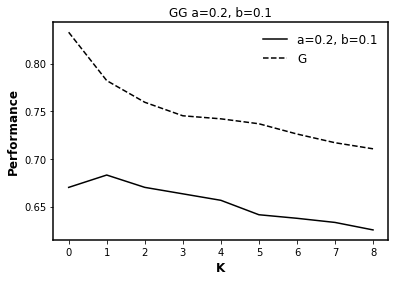

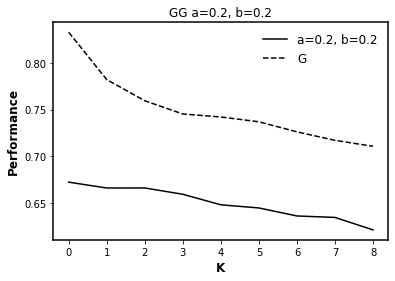

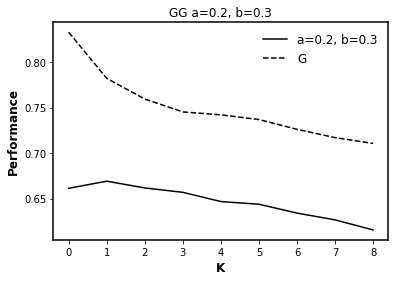

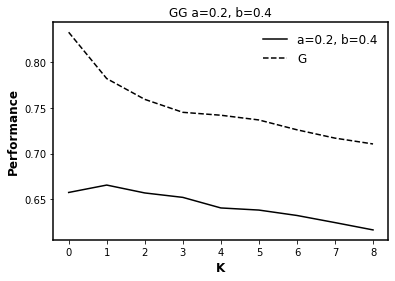

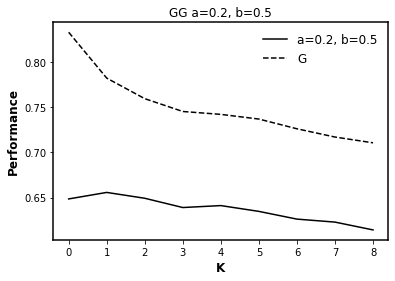

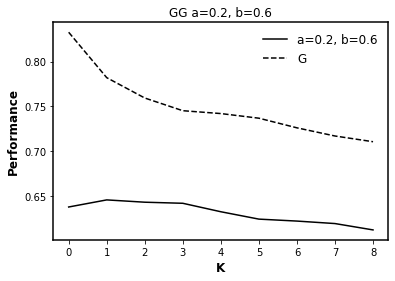

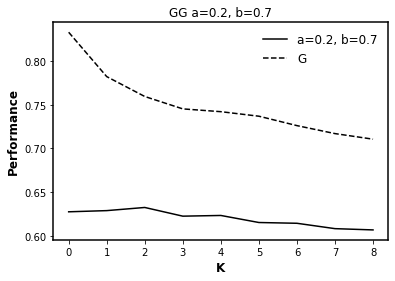

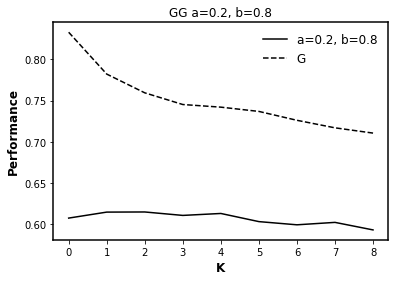

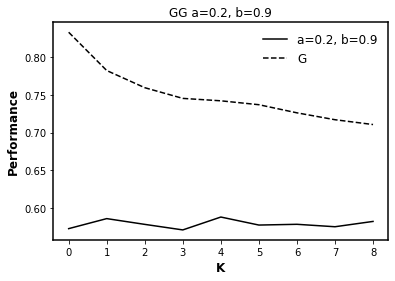

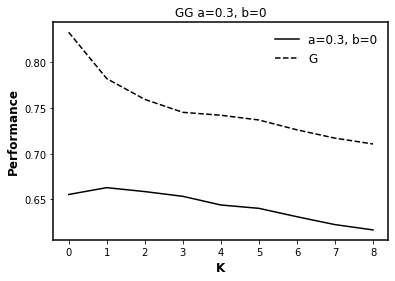

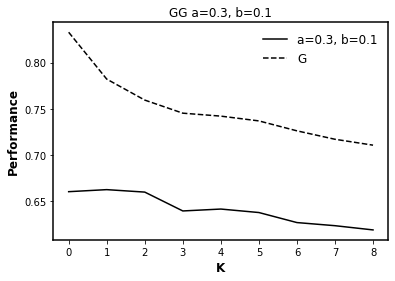

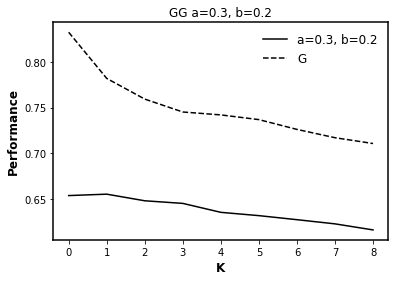

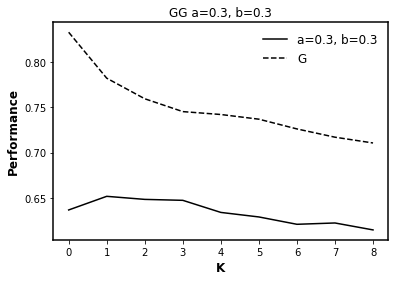

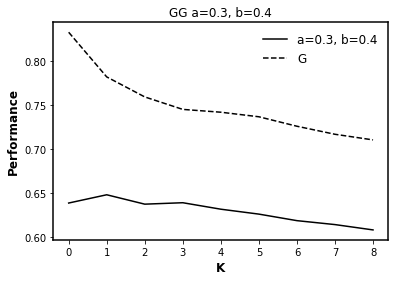

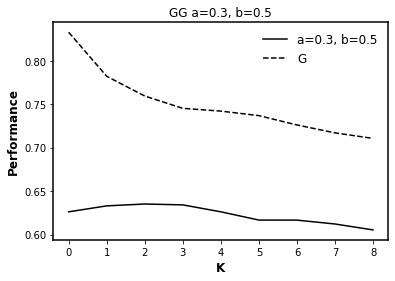

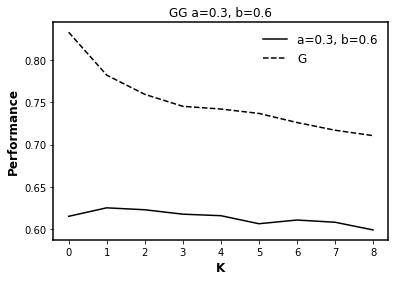

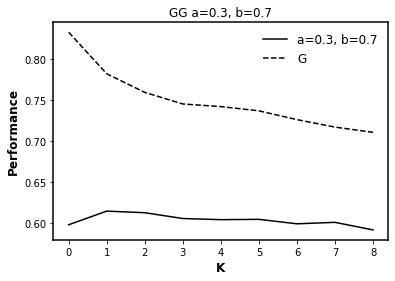

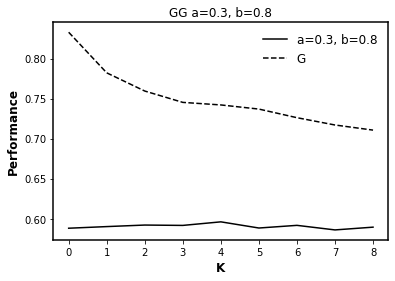

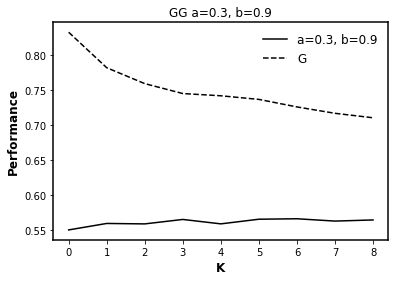

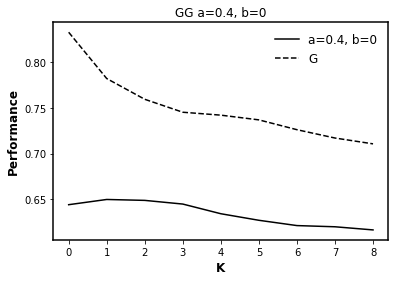

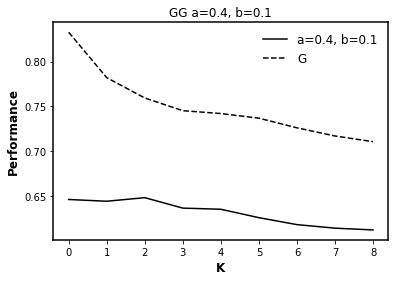

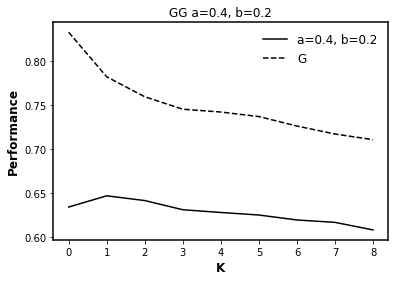

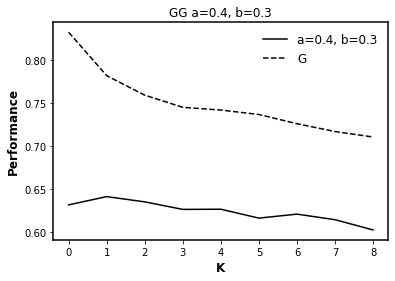

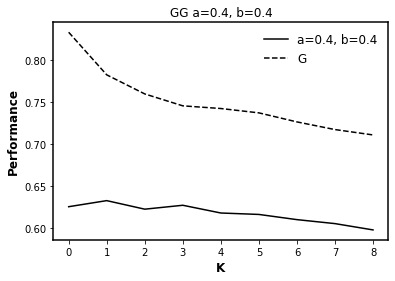

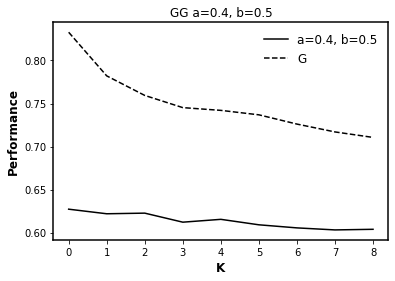

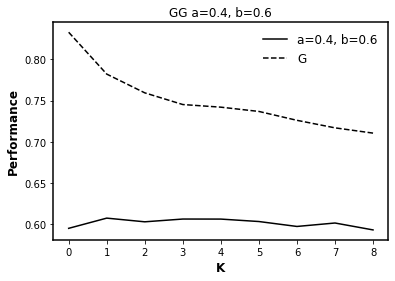

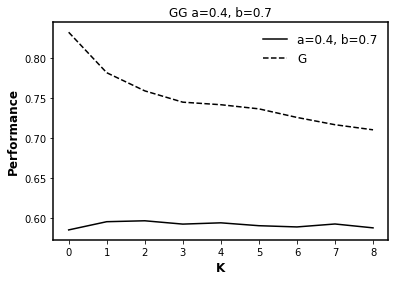

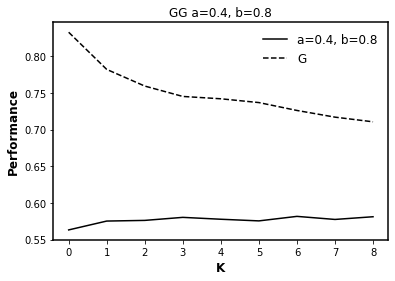

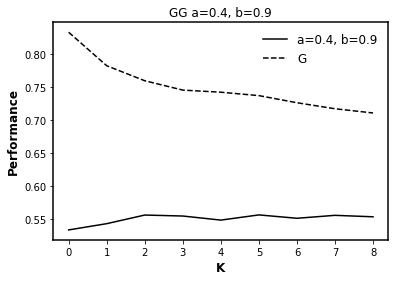

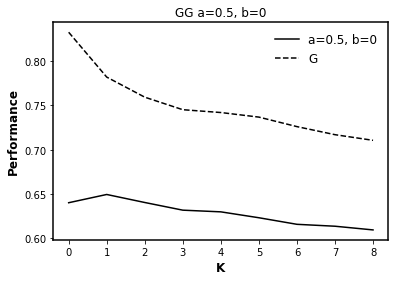

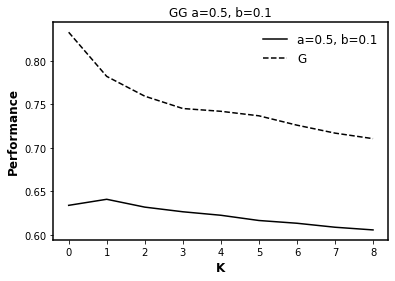

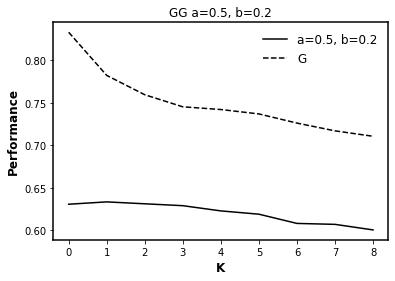

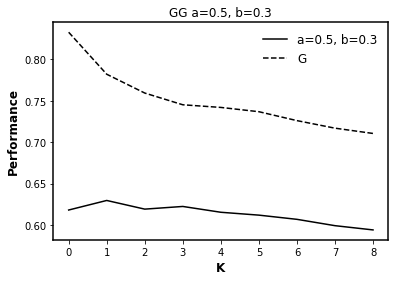

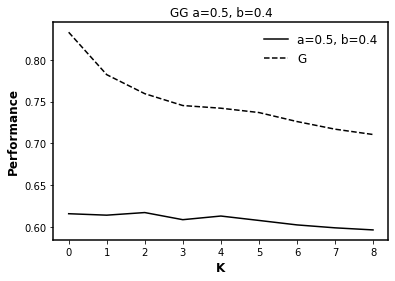

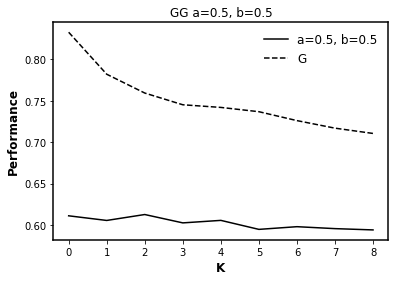

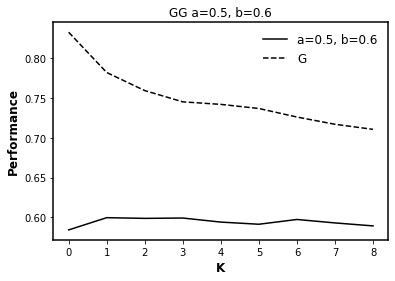

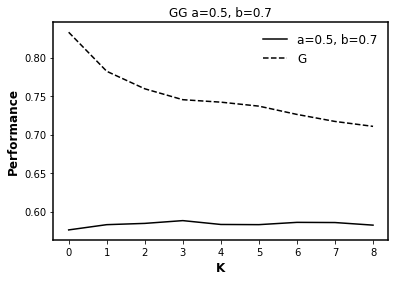

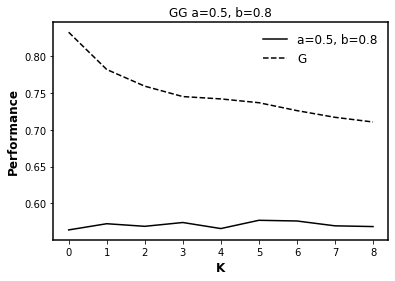

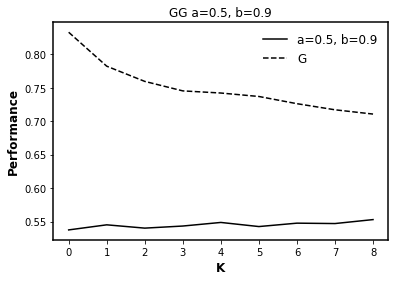

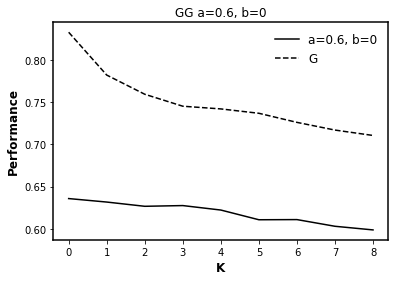

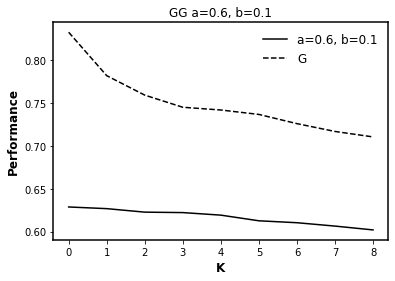

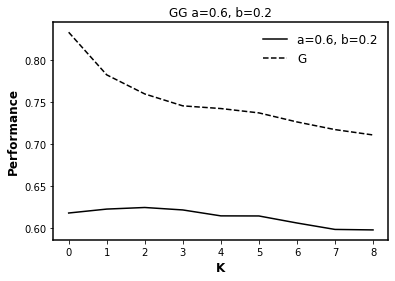

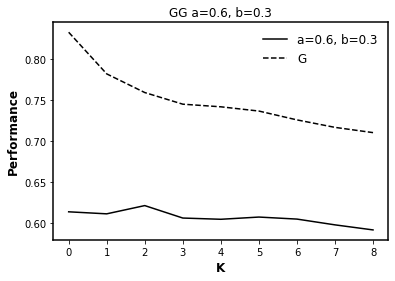

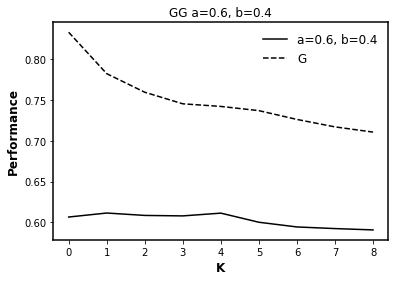

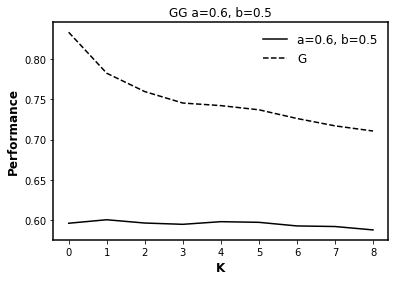

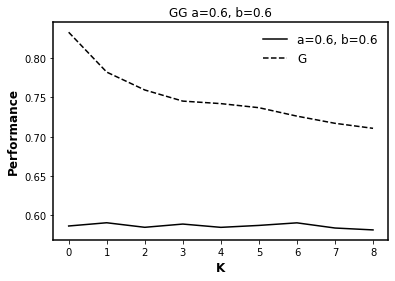

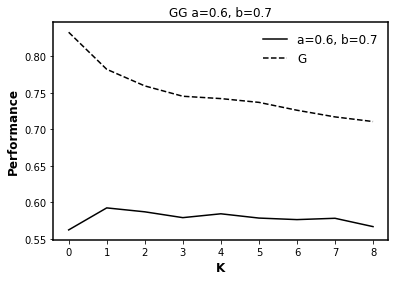

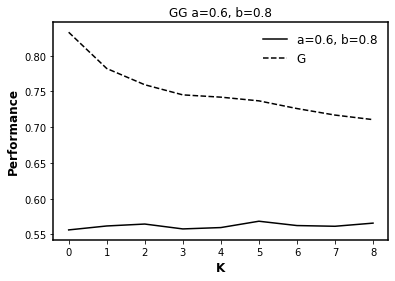

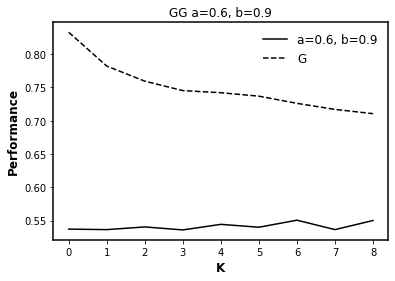

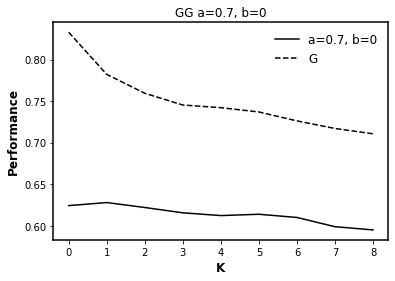

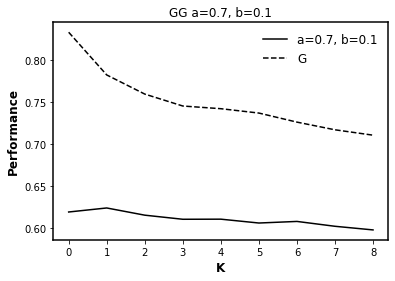

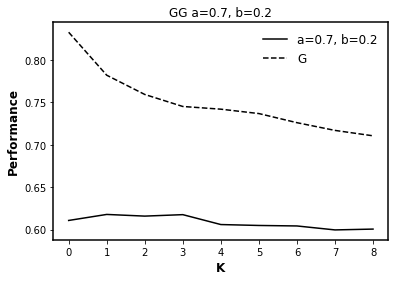

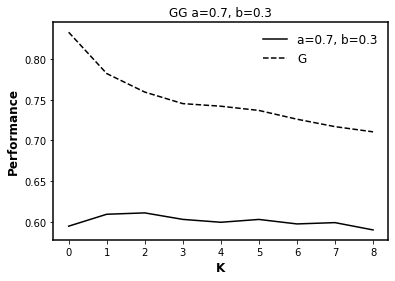

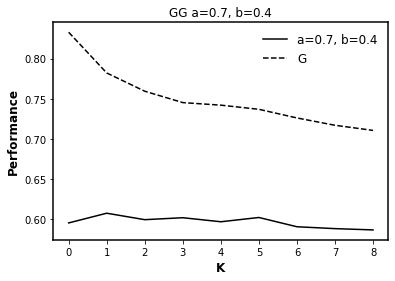

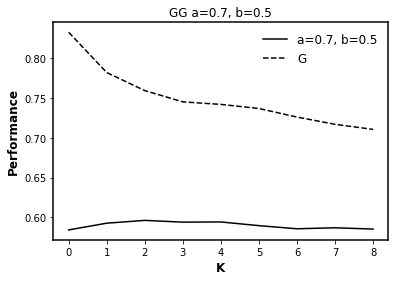

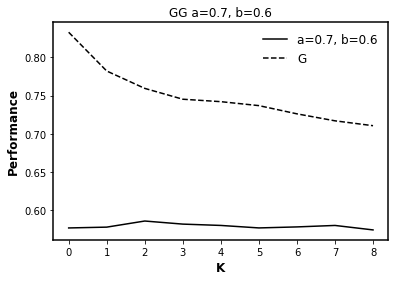

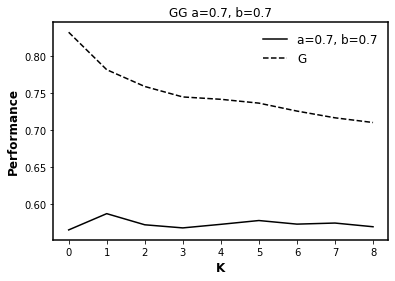

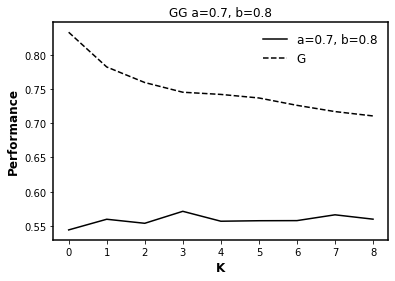

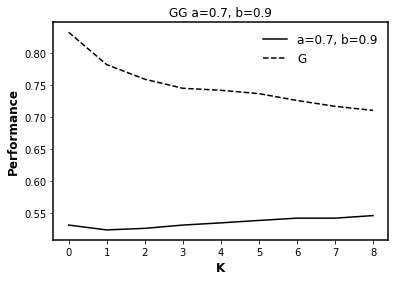

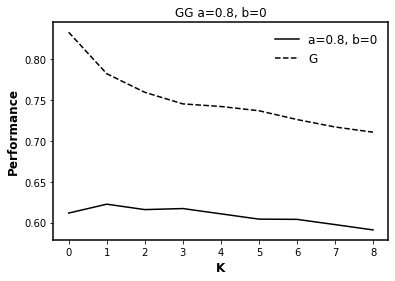

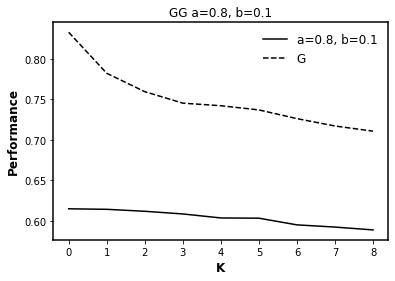

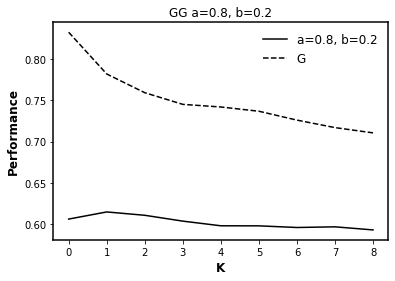

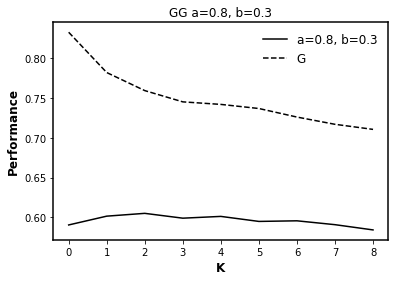

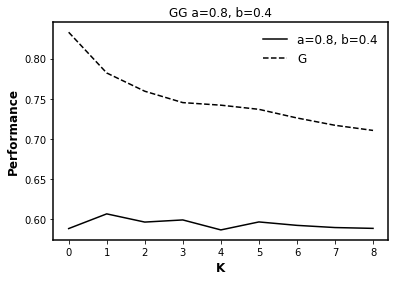

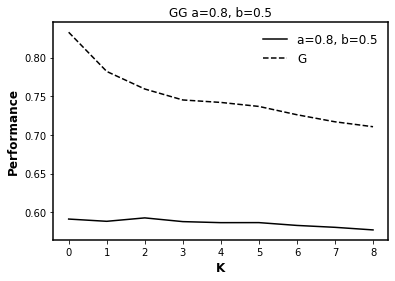

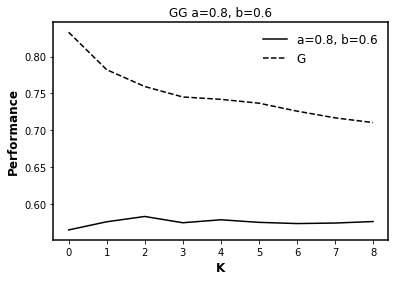

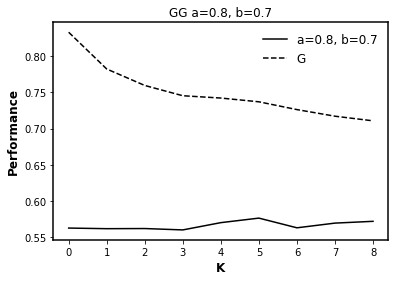

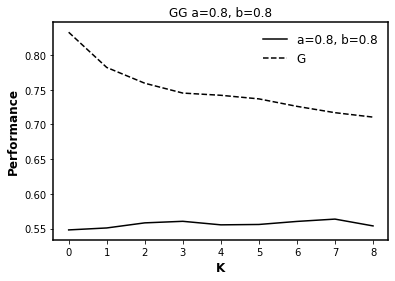

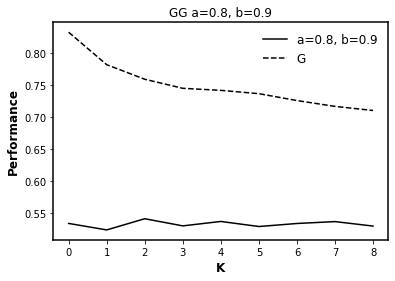

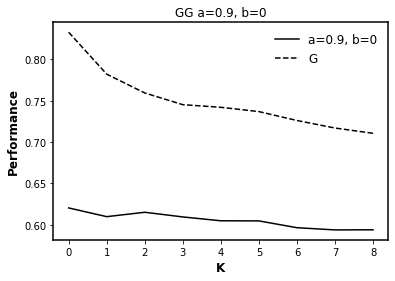

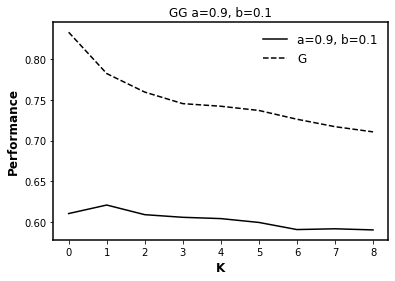

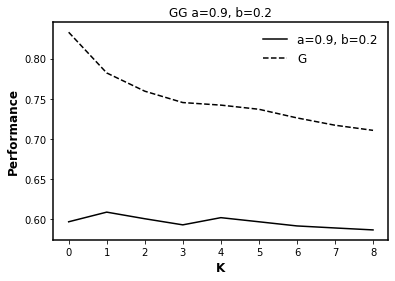

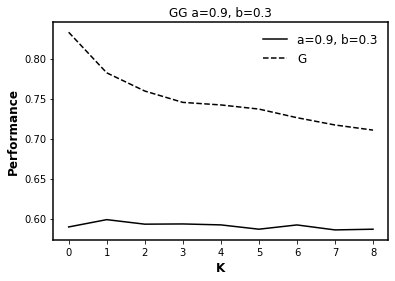

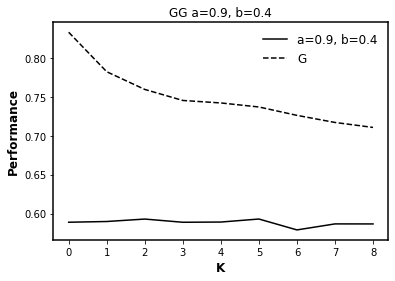

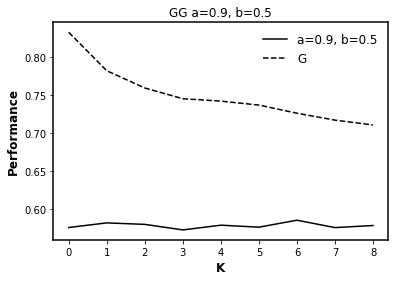

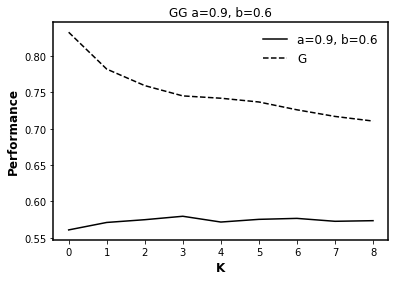

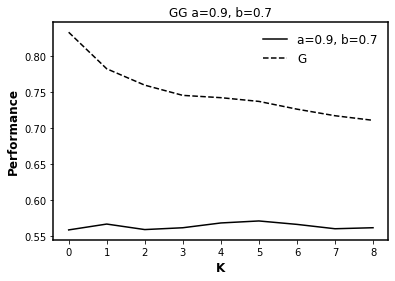

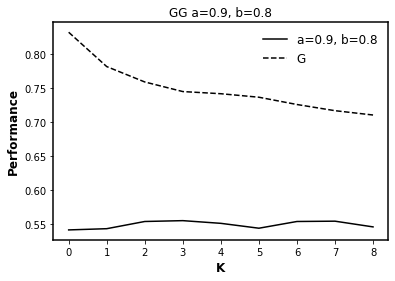

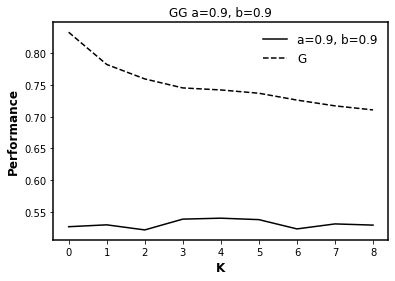

In [30]:
## GG Performance
i = 0
results_folder = r"E:\data\gst-0815-23\Hyper-parameters\GG_Results"
for index, value in multiple_lines.items():
    x = range(len(value))
    fig, ax = plt.subplots()
    ax.spines["left"].set_linewidth(1.5)
    ax.spines["right"].set_linewidth(1.5)
    ax.spines["top"].set_linewidth(1.5)
    ax.spines["bottom"].set_linewidth(1.5)
    plt.xlabel('K', fontweight='bold', fontsize=12)
    plt.ylabel('Performance', fontweight='bold', fontsize=12)
    plt.xticks(x)
    plt.grid(visible=False)
    plt.plot(x, value, "k-", label=index)
    plt.plot(x, g_fitness, "k--", label="G")
    plt.legend(frameon=False, ncol=1, fontsize=12)
    plt.title("GG {0}".format(index))
    plt.savefig(results_folder + r"\GG_performance_{0}.png".format(index), transparent=True, dpi=300)
    

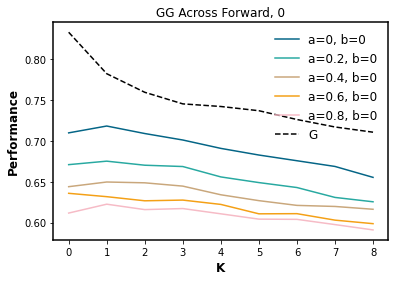

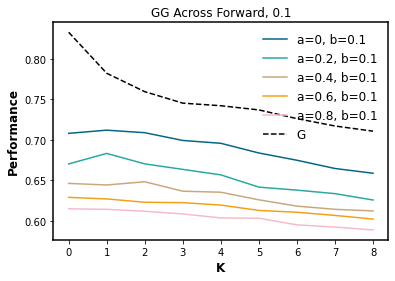

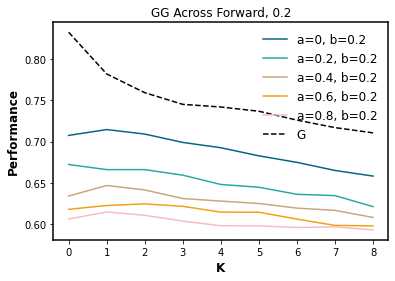

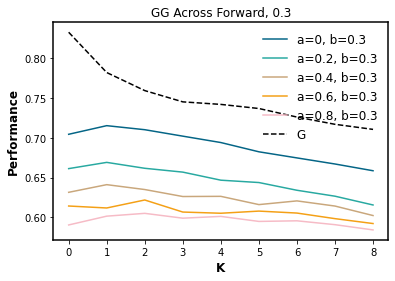

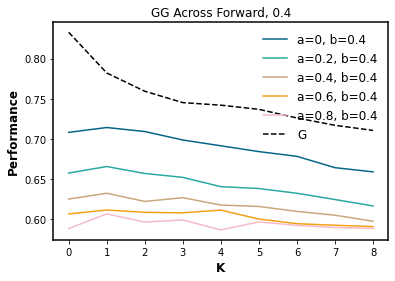

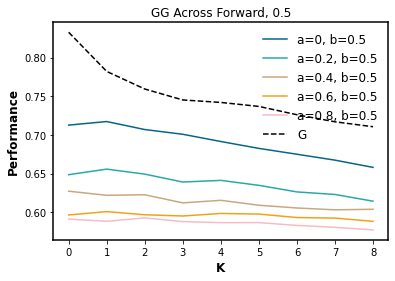

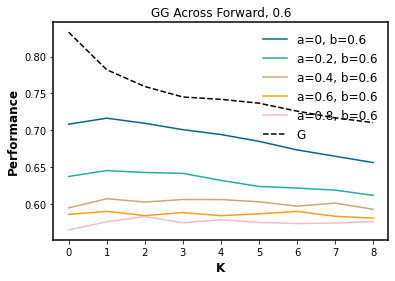

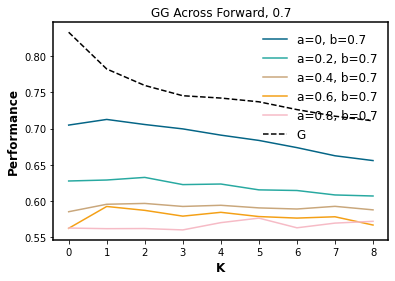

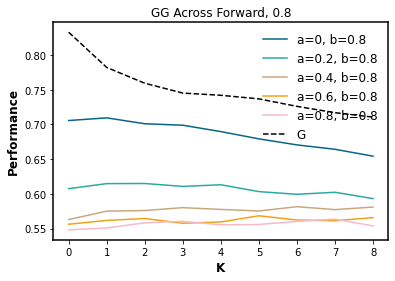

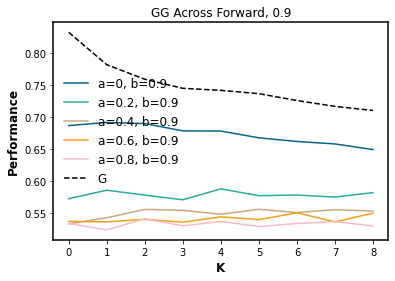

In [31]:
# Across a: Forward
string_list = []
roll_forward_list = [0, 0.2, 0.4, 0.6, 0.8]
roll_back_list = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for roll_back in roll_back_list:
    fig, ax = plt.subplots()
    ax.spines["left"].set_linewidth(1.5)
    ax.spines["right"].set_linewidth(1.5)
    ax.spines["top"].set_linewidth(1.5)
    ax.spines["bottom"].set_linewidth(1.5)
    plt.xlabel('K', fontweight='bold', fontsize=12)
    plt.ylabel('Performance', fontweight='bold', fontsize=12)
    plt.xticks(x)
    plt.grid(visible=False)
    for i, roll_forward in enumerate(roll_forward_list):
        string = "a={0}, b={1}".format(roll_forward, roll_back)
        data = multiple_lines[string]
        x = range(len(data))
        plt.plot(x, data, "-", label=string, color=morandi_colors[i])

    plt.plot(x, g_fitness, "k--", label="G")
    plt.legend(frameon=False, ncol=1, fontsize=12)
    plt.title("GG Across Forward, {0}".format(roll_back))
    plt.savefig(results_folder + r"\GG_performance_across_forward_{0}.png".format(roll_back), transparent=True, dpi=300)
        

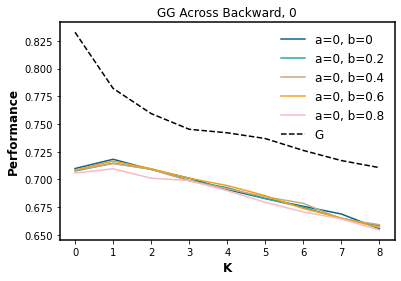

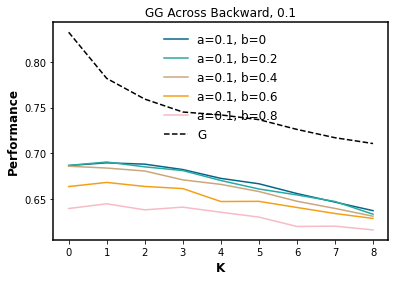

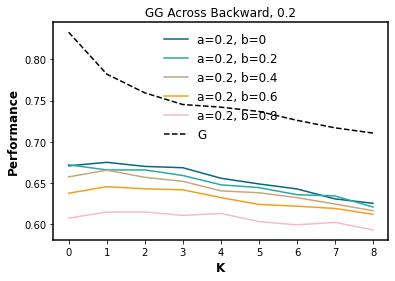

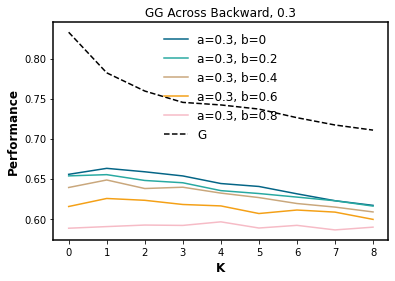

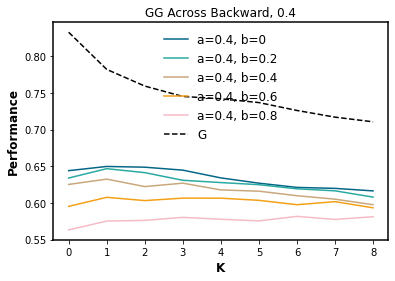

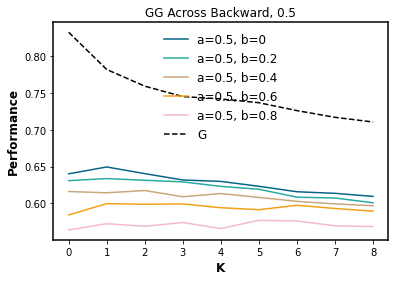

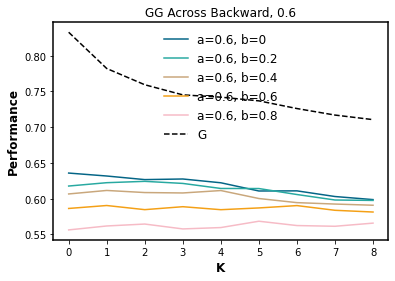

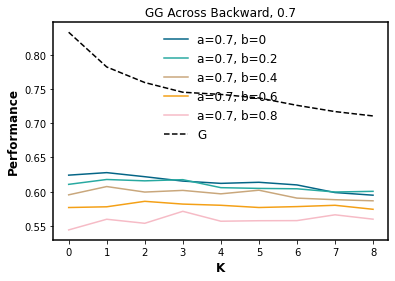

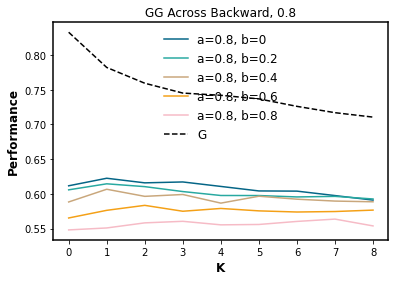

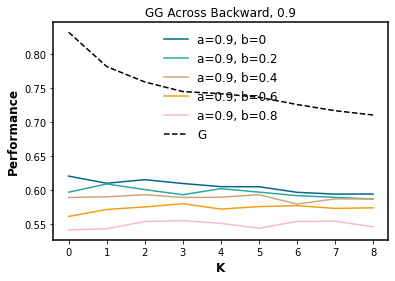

In [28]:
# Across a: Forward
roll_forward_list = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
roll_back_list = [0, 0.2, 0.4, 0.6, 0.8]
for roll_forward in roll_forward_list:
    fig, ax = plt.subplots()
    ax.spines["left"].set_linewidth(1.5)
    ax.spines["right"].set_linewidth(1.5)
    ax.spines["top"].set_linewidth(1.5)
    ax.spines["bottom"].set_linewidth(1.5)
    plt.xlabel('K', fontweight='bold', fontsize=12)
    plt.ylabel('Performance', fontweight='bold', fontsize=12)
    plt.xticks(x)
    plt.grid(visible=False)
    for i, roll_back in enumerate(roll_back_list):
        string = "a={0}, b={1}".format(roll_forward, roll_back)
        data = multiple_lines[string]
        x = range(len(data))
        plt.plot(x, data, "-", label=string, color=morandi_colors[i])

    plt.plot(x, g_fitness, "k--", label="G")
    plt.legend(frameon=False, ncol=1, fontsize=12)
    plt.title("GG Across Backward, {0}".format(roll_forward))
    plt.savefig(results_folder + r"\GG_performance_across_backward_{0}.png".format(roll_forward), transparent=True, dpi=300)
        